## Pokemon Dataset

In [117]:
import scipy.io as sio
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold 
from sklearn import metrics
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering as hac




%env OMP_NUM_THREADS=8
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.})

env: OMP_NUM_THREADS=8


In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
print df.describe()
print "Dimensiones del dataset:", df.shape

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

In [108]:
tipos = [np.NaN]
for i in range(df.shape[0]):
    if df.ix[i,'Type 1'] not in tipos:
        tipos.append(df.ix[i,'Type 1'])
    if df.ix[i,'Type 2'] not in tipos:
        tipos.append(df.ix[i,'Type 2']) 
tipos.remove(np.NaN)
print "Existen %d tipos"%len(tipos)
print tipos

Existen 18 tipos
['Grass', 'Poison', 'Fire', 'Flying', 'Dragon', 'Water', 'Bug', 'Normal', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Steel', 'Ice', 'Ghost', 'Dark']


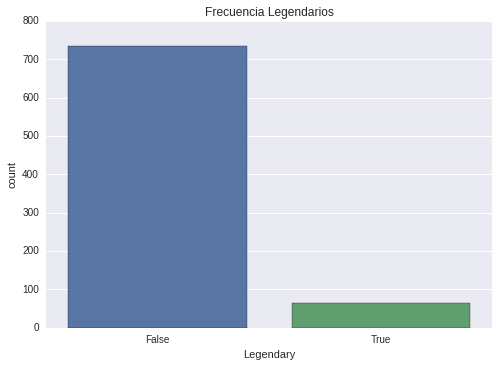

In [82]:
sns.countplot(x='Legendary',data =df)
plt.title('Frecuencia Legendarios')
plt.show()

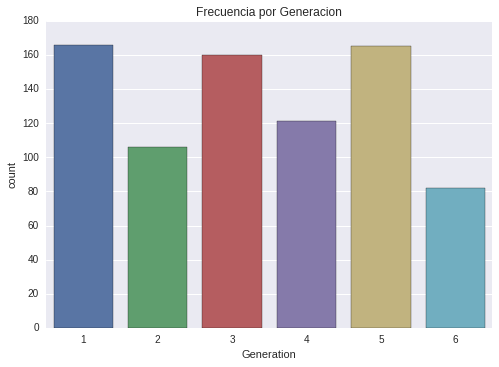

In [83]:
sns.countplot(x='Generation',data =df)
plt.title('Frecuencia por Generacion')
plt.show()

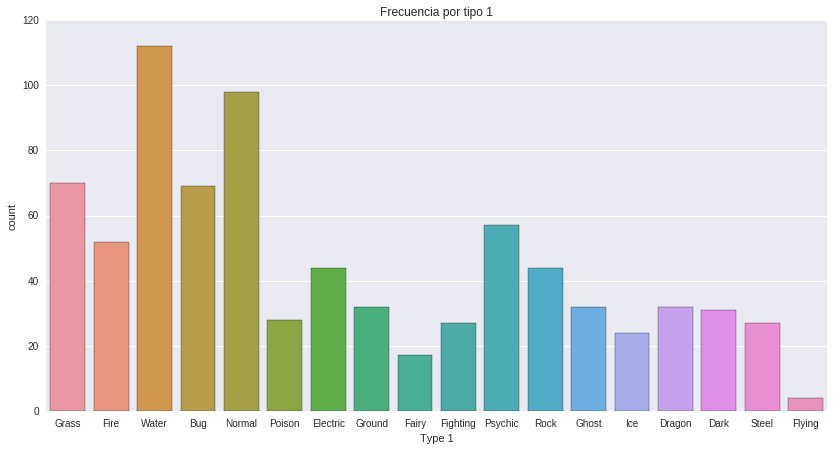

In [84]:
plt.figure(figsize=(14,7))
sns.countplot(x='Type 1',data =df)
plt.title('Frecuencia por tipo 1')
plt.show()

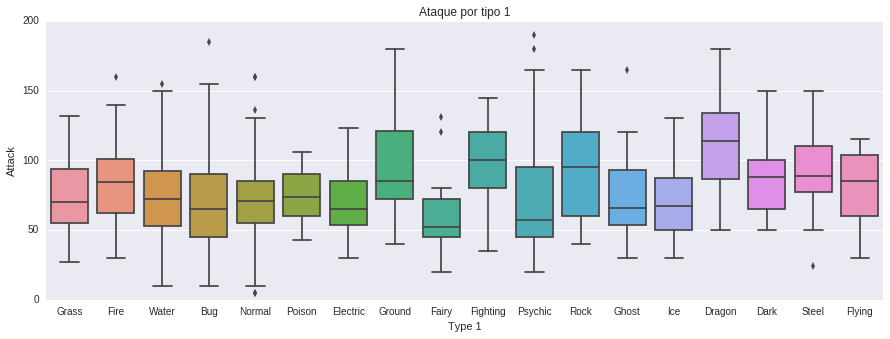

In [87]:
plt.subplots(figsize = (15,5))
plt.title('Ataque por tipo 1')
sns.boxplot(x = "Type 1", y = "Attack",data = df)
sns.plt.show()

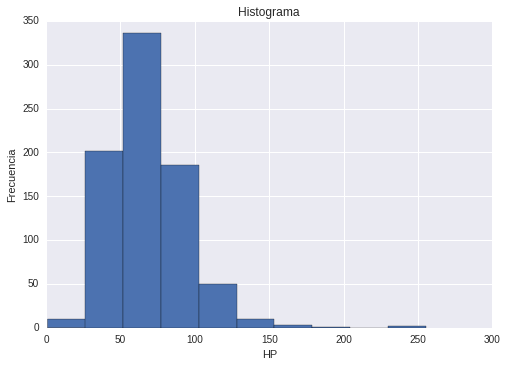

In [119]:
plt.hist(df['HP'])
plt.title("Histograma")
plt.ylabel('Frecuencia')
plt.xlabel('HP')
plt.show()

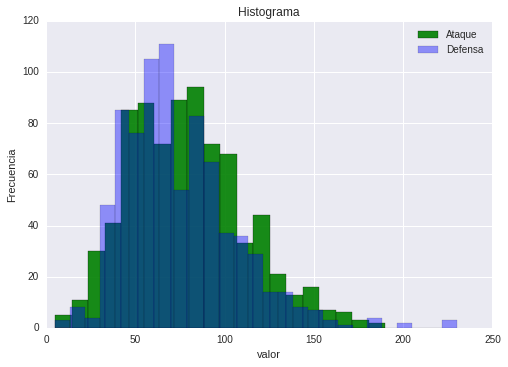

In [117]:
#plt.hist(df['Attack'])
sns.distplot(df['Attack'], color='g', label = "Ataque", kde=False, hist_kws={'alpha': 0.9})
sns.distplot(df['Defense'], color='b', label = "Defensa", kde=False, hist_kws={'alpha': 0.4})

plt.title("Histograma")
plt.ylabel('Frecuencia')
plt.xlabel('valor')
plt.legend()
plt.show()

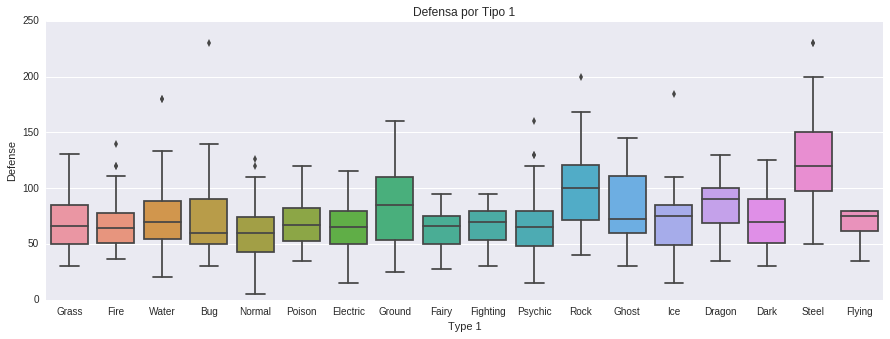

In [88]:
plt.subplots(figsize = (15,5))
plt.title('Defensa por Tipo 1')
sns.boxplot(x = "Type 1", y = "Defense",data = df)
sns.plt.show()

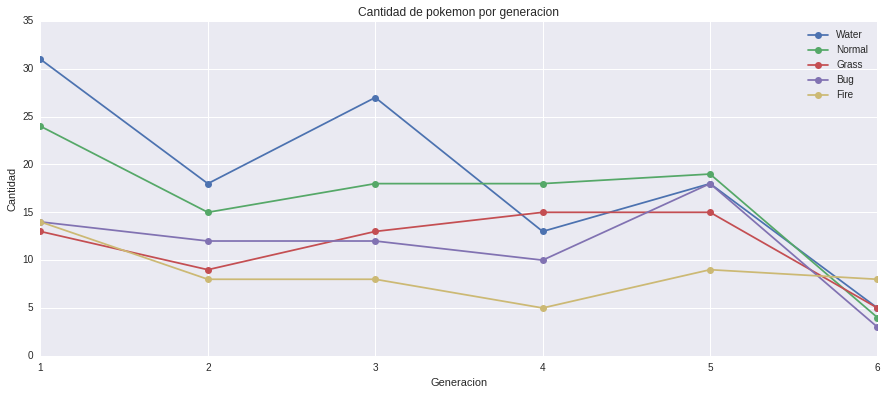

In [26]:
tipos_mas_repiten =["Water","Normal","Grass","Bug","Fire"]

valor_por_tipo = []
for tipo in tipos_mas_repiten:
    aux = []
    for i in range(1,7):
        filas = df[ (df['Generation'] == i) & (df['Type 1'] == tipo) ]
        aux.append(int(filas.shape[0]))
    valor_por_tipo.append(aux)

plt.figure(figsize=(15,6))
for valor, tipo in zip(valor_por_tipo,tipos_mas_repiten):
    plt.plot(range(1,7), valor, 'o-', label=tipo)
plt.legend()
plt.xlabel("Generacion")
plt.ylabel("Cantidad")
plt.title("Cantidad de pokemon por generacion")
plt.show()

### Visualizar 2d basado en los stats

In [109]:
valores = df.ix[:,'HP':'Speed'].values

scaler = StandardScaler(with_mean=True, with_std=True)
valores_escalados = scaler.fit_transform(valores)
print valores_escalados

[[-0.95062622 -0.92490618 -0.79715364 -0.2391303  -0.24818854 -0.80150318]
 [-0.3628221  -0.5241302  -0.34791742  0.21955954  0.29115635 -0.28501525]
 [ 0.42091674  0.09244823  0.29384863  0.83114599  1.01028289  0.40363531]
 ..., 
 [ 0.42091674  0.95565803 -0.44418232  2.36011211  2.08897269  0.05931003]
 [ 0.42091674  2.49710411 -0.44418232  2.97169856  2.08897269  0.40363531]
 [ 0.42091674  0.95565803  1.4811158   1.74852566  0.65071962  0.05931003]]


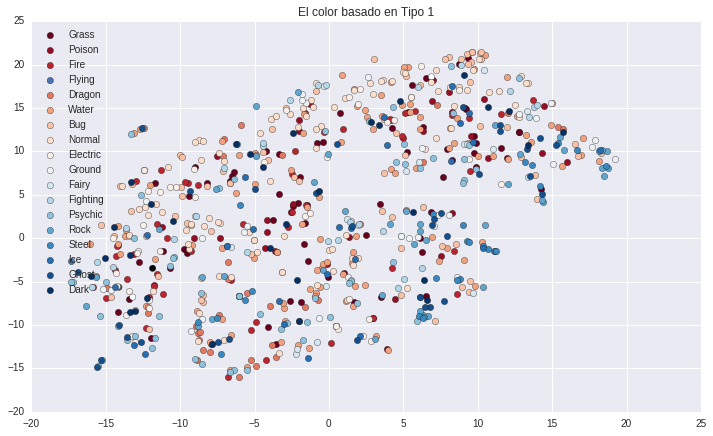

In [110]:
model = manifold.TSNE(n_components = 2)
#model = PCA(n_components = 2)
#model = manifold.SpectralEmbedding(n_components=2)

x2d = model.fit_transform(valores_escalados)

plt.figure(figsize=(12,7))

#por tipo 1
cmap = plt.cm.get_cmap(name = "RdBu") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(tipos))]

for tipo,col in zip(tipos,mcolors):
    mascara = df['Type 1'] == tipo
    datos_graficar = x2d[mascara]
    plt.scatter(datos_graficar[:,0],datos_graficar[:,1],label = tipo,c=col,s=40)

plt.title('El color basado en Tipo 1')
plt.legend(loc='upper left')
plt.show()

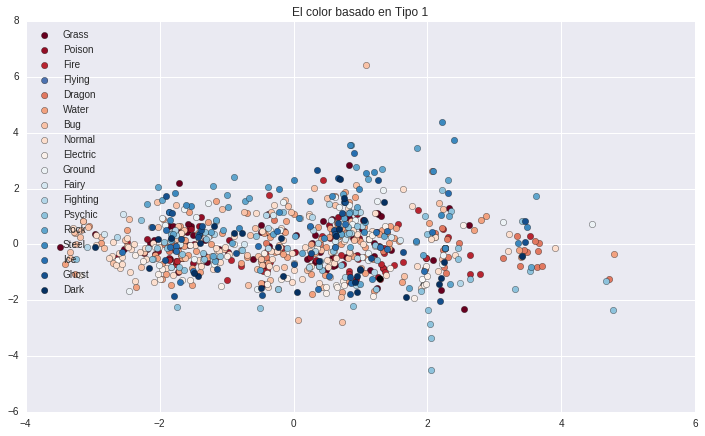

In [34]:
valores = df.ix[:,'HP':'Speed'].values
pca = PCA(n_components = 2)
#x2d = pca.fit_transform(valores)
x2d = pca.fit_transform(valores_escalados)

plt.figure(figsize=(12,7))

#por tipo 1
cmap = plt.cm.get_cmap(name = "RdBu") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(tipos))]

for tipo,col in zip(tipos,mcolors):
    mascara = df['Type 1'] == tipo
    datos_graficar = x2d[mascara]
    plt.scatter(datos_graficar[:,0],datos_graficar[:,1],label = tipo,c=col,s=40)

plt.title('El color basado en Tipo 1')
plt.legend(loc='upper left')
plt.show()

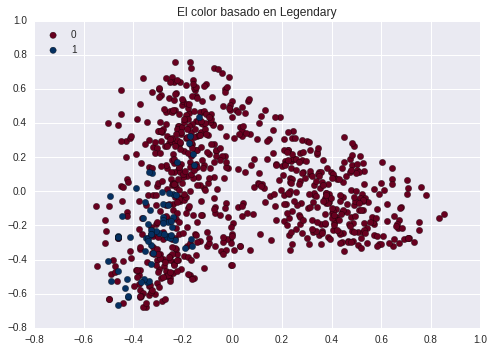

In [48]:
#por Legendary
cmap = plt.cm.get_cmap(name = "RdBu") 
mcolors = [cmap(i) for i in np.linspace(0,1,2)]
tipos = [0,1]
for tipo,col in zip(tipos,mcolors):
    mascara = df['Legendary'] == tipo
    datos_graficar = x2d[mascara]
    plt.scatter(datos_graficar[:,0],datos_graficar[:,1],label = tipo,c=col,s=40)
    
plt.title('El color basado en Legendary')
plt.legend(loc='upper left')
plt.show()

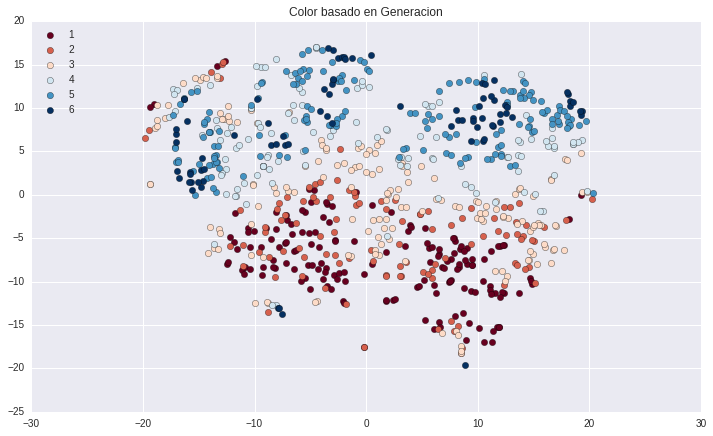

In [87]:
#por Generacion
tipos = np.arange(1,7,1)

plt.figure(figsize=(12,7))

cmap = plt.cm.get_cmap(name = "RdBu") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(tipos))]
for tipo,col in zip(tipos,mcolors):
    mascara = df['Generation'] == tipo
    datos_graficar = x2d[mascara]
    plt.scatter(datos_graficar[:,0],datos_graficar[:,1],label = tipo,c=col,s=40)

plt.title("Color basado en Generacion")
plt.legend(loc='upper left')
plt.show()

## CLUSTERING

In [111]:
from sklearn.cluster import DBSCAN

#se ajusta algortmo DBSCAN
clustering = DBSCAN(eps=1.3, min_samples=3, metric='euclidean')

clustering.fit(x2d)

DBScan_labels = clustering.labels_
unique_labels = set(DBScan_labels)
print "Cantidad de cluster: ",len(unique_labels)

Cantidad de cluster:  19


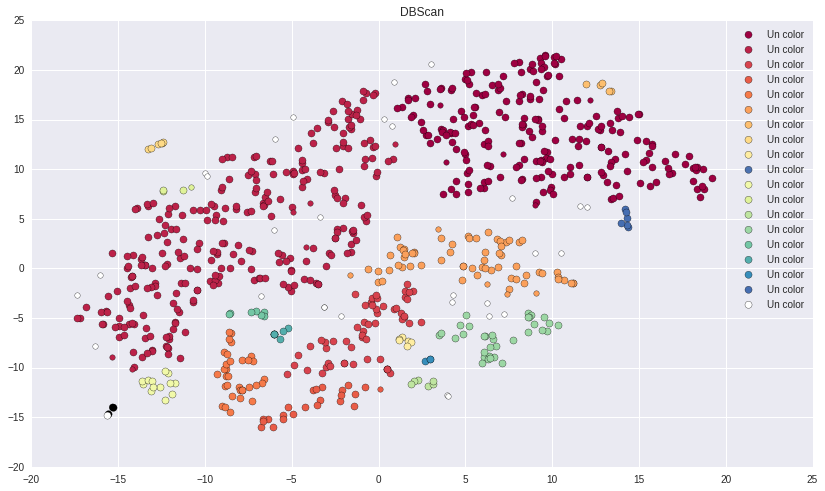

In [112]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype = bool)
core_samples_mask[clustering.core_sample_indices_] = True

#se grafica
plt.figure(figsize=(14,8))
plt.title('DBScan')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, mcolors):
    if k == -1:
        col = 'w'

    class_member_mask = (DBScan_labels == k)

    xy = x2d[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, s=50, label = "Un color")
    xy = x2d[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, s=30)

#plt.xticks(())
#plt.yticks(())
plt.legend()
plt.show()

In [113]:
#a categorico
df["Type 1"] = df["Type 1"].astype('category')
df["Type 2"] = df["Type 2"].astype('category')
df["Legendary"] = df["Legendary"].astype('category')


cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
2,3,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,4,Charmander,6,-1,309,39,52,43,60,50,65,1,0


### Verificar etiqueta

In [155]:
#posible_etiqueta = df['Type 1']
#posible_etiqueta = df['Legendary']
posible_etiqueta3 = df['Generation']


#calcular etiquetas de clusters con k = cantidad de nombres de cerveza
#k = len(set(posible_etiqueta))
k = 4
print "Cantidad de cluster: ",k

k_means = MiniBatchKMeans(n_clusters=k, batch_size=10, random_state=10, init = "k-means++")
hac_complete = hac(linkage="complete", n_clusters=k, affinity="euclidean")
hac_ward = hac(linkage="ward", n_clusters=k, affinity='euclidean')
dbscan = DBSCAN(eps=1.3, min_samples=3, metric='euclidean')

#k_means.fit(valores_escalados)
#hac_complete.fit(valores_escalados)
#hac_ward.fit(valores_escalados)
dbscan.fit(valores_escalados)
            
cluster_etiquetas = dbscan.labels_

Cantidad de cluster:  4


In [156]:
# escenario supervisado de evaluacion
print "ARI: ",metrics.adjusted_rand_score(posible_etiqueta, cluster_etiquetas) 
print "NMI: ",metrics.normalized_mutual_info_score(posible_etiqueta, cluster_etiquetas)
print "Hom: ",metrics.homogeneity_score(posible_etiqueta, cluster_etiquetas)
print "Compl: ",metrics.completeness_score(posible_etiqueta, cluster_etiquetas)
print "V-mes: ",metrics.v_measure_score(posible_etiqueta, cluster_etiquetas)
print "FMS: ",metrics.fowlkes_mallows_score(posible_etiqueta, cluster_etiquetas)

# escenario no supervisado de evaluacion
print "Silhuette: ",metrics.silhouette_score(valores_escalados, cluster_etiquetas, metric='euclidean')

ARI:  0.208827002107
NMI:  0.0660328448685
Hom:  0.0709381119812
Compl:  0.0614667698315
V-mes:  0.0658636832983
FMS:  0.875553903089
Silhuette:  0.276153593078
